In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [5]:
df = pd.read_csv('/content/parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
df.shape

(195, 24)

In [7]:
df.tail(30)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
165,phon_R01_S42_1,236.200,244.663,102.137,0.00277,0.00001,0.00154,0.00153,0.00462,0.02448,0.217,0.01410,0.01426,0.01621,0.04231,0.00620,24.078,0,0.469928,0.628232,-6.816086,0.172270,2.235197,0.119652
166,phon_R01_S42_2,237.323,243.709,229.256,0.00303,0.00001,0.00173,0.00159,0.00519,0.01242,0.116,0.00696,0.00747,0.00882,0.02089,0.00533,24.679,0,0.384868,0.626710,-7.018057,0.176316,1.852402,0.091604
167,phon_R01_S42_3,260.105,264.919,237.303,0.00339,0.00001,0.00205,0.00186,0.00616,0.02030,0.197,0.01186,0.01230,0.01367,0.03557,0.00910,21.083,0,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587
168,phon_R01_S42_4,197.569,217.627,90.794,0.00803,0.00004,0.00490,0.00448,0.01470,0.02177,0.189,0.01279,0.01272,0.01439,0.03836,0.01337,19.269,0,0.372222,0.725216,-5.736781,0.164529,2.882450,0.202879
169,phon_R01_S42_5,240.301,245.135,219.783,0.00517,0.00002,0.00316,0.00283,0.00949,0.02018,0.212,0.01176,0.01191,0.01344,0.03529,0.00965,21.020,0,0.371837,0.646167,-7.169701,0.073298,2.266432,0.100881
170,phon_R01_S42_6,244.990,272.210,239.170,0.00451,0.00002,0.00279,0.00237,0.00837,0.01897,0.181,0.01084,0.01121,0.01255,0.03253,0.01049,21.528,0,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220
171,phon_R01_S43_1,112.547,133.374,105.715,0.00355,0.00003,0.00166,0.00190,0.00499,0.01358,0.129,0.00664,0.00786,0.01140,0.01992,0.00435,26.436,0,0.413295,0.756700,-6.323531,0.218885,2.193412,0.160376
172,phon_R01_S43_2,110.739,113.597,100.139,0.00356,0.00003,0.00170,0.00200,0.00510,0.01484,0.133,0.00754,0.00950,0.01285,0.02261,0.00430,26.550,0,0.369090,0.776158,-6.085567,0.192375,1.889002,0.174152
173,phon_R01_S43_3,113.715,116.443,96.913,0.00349,0.00003,0.00171,0.00203,0.00514,0.01472,0.133,0.00748,0.00905,0.01148,0.02245,0.00478,26.547,0,0.380253,0.766700,-5.943501,0.192150,1.852542,0.179677
174,phon_R01_S43_4,117.004,144.466,99.923,0.00353,0.00003,0.00176,0.00218,0.00528,0.01657,0.145,0.00881,0.01062,0.01318,0.02643,0.00590,25.445,0,0.387482,0.756482,-6.012559,0.229298,1.872946,0.163118


# Locating 7th sample for three individuals

In most cases in this data set, there are six samples per individual.  In three cases, there are 7 samples per individual.  The seventh sample is being removed to make the number of samples per individual the same. 


In [8]:
strings = df['name']   #Source: https://www.kite.com/python/answers/how-to-check-if-a-list-contains-a-substring-in-python
substring = "_7"       #Identifying if there are any sample names with _7

substring_in_list = any(substring in string for string in strings)

print(substring_in_list)

True


In [9]:
matching = [s for s in df['name'] if "_7" in s] #Source: https://stackoverflow.com/questions/4843158/how-to-check-if-a-string-is-a-substring-of-items-in-a-list-of-strings
matching                                        #Identify names of the 7th samples

['phon_R01_S21_7', 'phon_R01_S27_7', 'phon_R01_S35_7']

In [10]:
df.loc[df['name']=='phon_R01_S21_7']    #Locate rows with 7th sample

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
90,phon_R01_S21_7,166.605,206.008,78.032,0.00742,0.00004,0.00387,0.00453,0.01161,0.0664,0.634,0.0365,0.04282,0.05114,0.10949,0.08725,11.744,1,0.65341,0.733165,-4.508984,0.389232,3.317586,0.301952


In [11]:
df.loc[df['name']=='phon_R01_S27_7']

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
121,phon_R01_S27_7,176.824,215.293,83.961,0.0046,0.00003,0.00209,0.00221,0.00628,0.01169,0.117,0.00534,0.0063,0.01104,0.01603,0.01161,27.166,1,0.400088,0.656182,-4.711007,0.281618,2.655744,0.234809


In [12]:
df.loc[df['name']=='phon_R01_S35_7']

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
152,phon_R01_S35_7,198.116,233.099,174.478,0.02714,0.00014,0.01568,0.01699,0.04705,0.08684,1.018,0.04284,0.05556,0.08318,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721


In [13]:
df = df.drop([df.index[90], df.index[121], df.index[152]])   #Drop 7th rows for each of the three individuals
df.shape 

(192, 24)

In [14]:
def get_range(df, start, finish):  #Source: https://stackoverflow.com/questions/50805446/pandas-select-range-from-index-column
             return df[start:finish]  #Print portion of database to determine if 7th samples were removed
print(get_range(df, 76,100))

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...   spread2        D2       PPE
76   phon_R01_S19_5      112.876       148.826  ...  0.341169  2.007923  0.193918
77   phon_R01_S19_6      110.568       125.394  ...  0.250572  1.777901  0.232744
78   phon_R01_S20_1       95.385       102.145  ...  0.249494  2.017753  0.260015
79   phon_R01_S20_2      100.770       115.697  ...  0.265699  2.398422  0.277948
80   phon_R01_S20_3       96.106       108.664  ...  0.155097  2.645959  0.327978
81   phon_R01_S20_4       95.605       107.715  ...  0.210458  2.232576  0.260633
82   phon_R01_S20_5      100.960       110.019  ...  0.146948  2.428306  0.264666
83   phon_R01_S20_6       98.804       102.305  ...  0.078202  2.053601  0.177275
84   phon_R01_S21_1      176.858       205.560  ...  0.343073  3.099301  0.242119
85   phon_R01_S21_2      180.978       200.125  ...  0.315903  3.098256  0.200423
86   phon_R01_S21_3      178.222       202.450  ...  0.335753  2.654271  0.144614
87   phon_R01_S2

In [15]:
df.info()  #Now 192 samples which would be 32 individuals with 6 samples each

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              192 non-null    object 
 1   MDVP:Fo(Hz)       192 non-null    float64
 2   MDVP:Fhi(Hz)      192 non-null    float64
 3   MDVP:Flo(Hz)      192 non-null    float64
 4   MDVP:Jitter(%)    192 non-null    float64
 5   MDVP:Jitter(Abs)  192 non-null    float64
 6   MDVP:RAP          192 non-null    float64
 7   MDVP:PPQ          192 non-null    float64
 8   Jitter:DDP        192 non-null    float64
 9   MDVP:Shimmer      192 non-null    float64
 10  MDVP:Shimmer(dB)  192 non-null    float64
 11  Shimmer:APQ3      192 non-null    float64
 12  Shimmer:APQ5      192 non-null    float64
 13  MDVP:APQ          192 non-null    float64
 14  Shimmer:DDA       192 non-null    float64
 15  NHR               192 non-null    float64
 16  HNR               192 non-null    float64
 1

In [16]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,153.817917,196.776349,116.389750,0.006114,0.000044,0.003245,0.003377,0.009737,0.029314,0.277448,0.015468,0.017612,0.023701,0.046404,0.023873,21.976073,0.750000,0.497796,0.718154,-5.710404,0.224700,2.371348,0.204615
std,41.548965,92.158243,43.508538,0.004642,0.000034,0.002852,0.002598,0.008554,0.018308,0.186884,0.009898,0.011635,0.016387,0.029694,0.039213,4.288654,0.434145,0.103722,0.055515,1.073304,0.082583,0.374673,0.088719
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.262000,134.549750,85.286250,0.003450,0.000020,0.001658,0.001855,0.004975,0.016537,0.148750,0.008268,0.009585,0.013085,0.024802,0.005890,19.251750,0.750000,0.421768,0.674855,-6.456900,0.173470,2.094037,0.136103
50%,148.367000,172.917500,104.376000,0.004940,0.000030,0.002485,0.002680,0.007455,0.022965,0.219000,0.012780,0.013450,0.018125,0.038335,0.011545,22.152000,1.000000,0.493649,0.722170,-5.730418,0.217525,2.352424,0.193324
75%,182.393500,224.093750,139.504250,0.007285,0.000060,0.003747,0.003912,0.011250,0.037610,0.348500,0.019063,0.021882,0.029198,0.057193,0.024960,25.053750,1.000000,0.586366,0.762563,-5.127827,0.271301,2.614510,0.252080
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# Data Cleaning


---



# Check for duplicate rows

In [17]:
df.duplicated().sum() #no duplicate rows

0

# Check for missing values

In [18]:
df.isnull().sum() #no missing values

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# Average Samples


---



Average six samples per individual

In [20]:
import numpy as np

In [21]:
# Group every six rows in dataframe and average column values.  (Six sets of data per individual in the study)
grouped_df = df.groupby(np.arange(len(df.index))//6, axis=0).mean() #source: link below

https://stackoverflow.com/questions/46478518/groupby-dataframe-by-n-columns-or-n-rows

In [22]:
grouped_df.shape  #32 individuals and 23 features

(32, 23)

In [23]:
grouped_df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,118.719333,141.312833,106.029833,0.010085,0.000087,0.004998,0.007312,0.014992,0.053932,0.515167,0.028025,0.039770,0.037348,0.084073,0.016318,20.406667,1,0.428488,0.821314,-4.239926,0.296836,2.342642,0.353841
1,99.770333,121.894333,95.413167,0.004585,0.000050,0.002325,0.002857,0.006978,0.021668,0.194333,0.011042,0.013113,0.018123,0.033125,0.008917,22.997333,1,0.598429,0.778017,-5.420414,0.308289,2.287428,0.234019
2,147.346167,216.867500,87.532333,0.004347,0.000030,0.001760,0.002320,0.005285,0.019343,0.181667,0.009383,0.011003,0.018410,0.028148,0.013080,23.899667,1,0.521660,0.645843,-5.337281,0.249288,2.360638,0.232007
3,159.837667,181.630167,86.767167,0.006247,0.000040,0.003062,0.003422,0.009188,0.043337,0.388167,0.020492,0.026550,0.044458,0.061477,0.025608,19.058667,1,0.626723,0.695886,-4.560947,0.278482,2.787869,0.310658
4,150.644667,208.264333,78.278333,0.005230,0.000037,0.002725,0.002838,0.008173,0.021367,0.209667,0.009673,0.012625,0.020725,0.029023,0.014892,24.762000,1,0.432723,0.719675,-6.223537,0.228296,2.440360,0.164939


# Modeling on Averaged Data


---

# Model Validation


In [29]:
y = grouped_df['status']
X = grouped_df.drop(columns = ['status'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Default Classifier Model

In [32]:
grouped_df['status'].value_counts(normalize = 'True')

1    0.75
0    0.25
Name: status, dtype: float64

In [33]:
all_ones = np.ones(len(y_test))
all_ones

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [34]:
class_report_default = classification_report(y_test, all_ones);
print(class_report_default)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      1.00      0.86         6

    accuracy                           0.75         8
   macro avg       0.38      0.50      0.43         8
weighted avg       0.56      0.75      0.64         8



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN - Basic Model - Averaged Data

In [35]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

pipe = make_pipeline(scaler, knn)

In [36]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [37]:
y_pred = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

In [38]:
knn_train_accuracy = accuracy_score(y_train, y_pred_train)
print(f'KNN Train Accuracy: {knn_train_accuracy}')

KNN Train Accuracy: 0.875


In [39]:
knn_test_accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Test Accuracy: {knn_test_accuracy}')

KNN Test Accuracy: 0.875


In [40]:
class_report_knn_basic = classification_report(y_pred, y_test)
print(class_report_knn_basic)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.86      0.92         7

    accuracy                           0.88         8
   macro avg       0.75      0.93      0.79         8
weighted avg       0.94      0.88      0.89         8



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


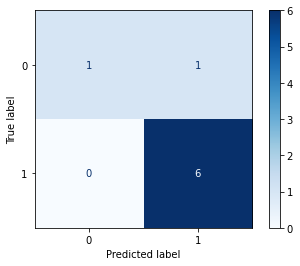

In [41]:
plot_confusion_matrix(pipe, X_test, y_test, cmap = 'Blues');

# KNN - Optimized - Averaged Data

Plot error rate versus n_neighbors to determine optimum number of n_neighbors

Minimum error:- 0.125 at K = 1


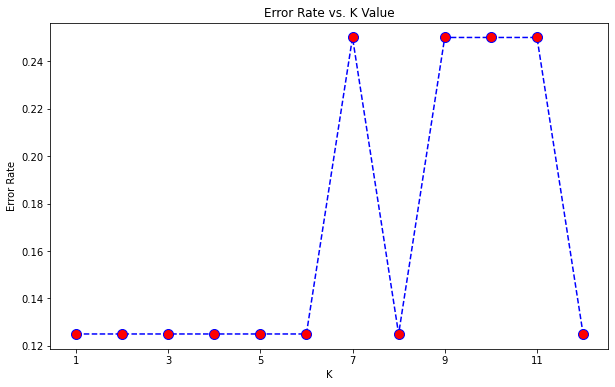

In [43]:
error_rate = []   #source: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb
for i in range(1,13):          #Finding minimum error
 knn1 = KNeighborsClassifier(n_neighbors=i)
 pipe_knn1 = make_pipeline(scaler,knn1)

 pipe_knn1.fit(X_train,y_train)
 pred_i = pipe_knn1.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,13),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.xticks(np.arange(1,13, step=2))
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Plot accuracy versus n_neighbors to determine optimum number of n_neighbors

Maximum accuracy:- 0.875 at K = 1


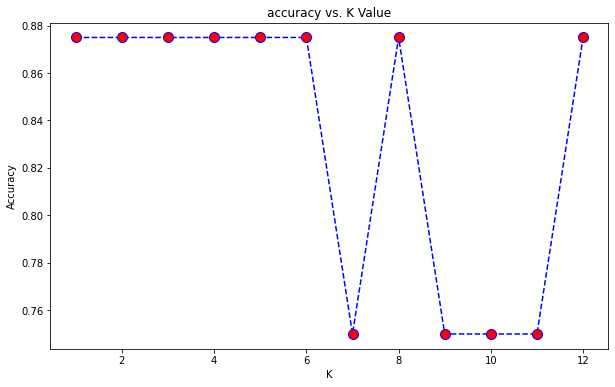

In [45]:
acc = [] #source: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb
from sklearn import metrics #finding maximum accuracy
for i in range(1,13):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    pipe_knn1 = make_pipeline(scaler,knn1)
    pipe_knn1.fit(X_train,y_train)    
    yhat = pipe_knn1.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,13),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",(acc.index(max(acc))+1))

Both of the above plots above indicate that the number of samples in the dataset is too limited to adjust for n_neighbors. Therefore, n_neighbors will be set at 1 in the optimized model below. The KNN model on this dataset will be overfit.

In [46]:
scaler = StandardScaler()
knn_n1 = KNeighborsClassifier(n_neighbors=1)

numeric_selector = make_column_selector(dtype_include = 'number')
scaler_tuple = (scaler, numeric_selector)
col_transformer = make_column_transformer(scaler_tuple, remainder = 'passthrough')
pipe1 = make_pipeline(col_transformer, knn_n1)

In [47]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8aa4168150>)])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [48]:
y_pred_knn_n1 = pipe1.predict(X_test)

In [49]:
y_pred_knn_n1_train = pipe1.predict(X_train)

In [50]:
knn_n1_train_accuracy = accuracy_score(y_train, y_pred_knn_n1_train)
print(f'KNN with n_neighbors = 1 Train Accuracy: {knn_n1_train_accuracy}')

KNN with n_neighbors = 1 Train Accuracy: 1.0


In [51]:
knn_n1_test_accuracy = accuracy_score(y_test, y_pred_knn_n1)
print(f'KNN with n_neighbors = 1 Test Accuracy: {knn_n1_test_accuracy}')

KNN with n_neighbors = 1 Test Accuracy: 0.875


In [52]:
class_report_knn_n1 = classification_report(y_test, y_pred_knn_n1)
print(class_report_knn_n1)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.86      1.00      0.92         6

    accuracy                           0.88         8
   macro avg       0.93      0.75      0.79         8
weighted avg       0.89      0.88      0.86         8



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


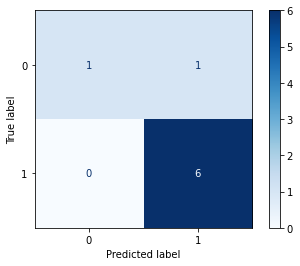

In [53]:
plot_confusion_matrix(pipe1, X_test, y_test, cmap = 'Blues');

# Light Gradient Boosting Machine - Base Model - Averaged Data

In [54]:
lgb = LGBMClassifier()

In [55]:
pipe_lgb = make_pipeline(col_transformer, lgb)

In [56]:
pipe_lgb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8aa4168150>)])),
                ('lgbmclassifier', LGBMClassifier())])

In [57]:
y_pred_lgb_train = pipe_lgb.predict(X_train)
y_pred_lgb_test = pipe_lgb.predict(X_test)

In [58]:
accuracy_lgb_train = accuracy_score(y_train, y_pred_lgb_train)
print(f'Light Gradient Boosting Train Accuracy: {accuracy_lgb_train}')

Light Gradient Boosting Train Accuracy: 0.75


In [59]:
accuracy_lgb_test = accuracy_score(y_test, y_pred_lgb_test)
print(f'Light Gradient Boosting Test Accuracy: {accuracy_lgb_test}')

Light Gradient Boosting Test Accuracy: 0.75


In [60]:
class_report_lgb = classification_report(y_test, y_pred_lgb_test)
print(class_report_lgb)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      1.00      0.86         6

    accuracy                           0.75         8
   macro avg       0.38      0.50      0.43         8
weighted avg       0.56      0.75      0.64         8



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


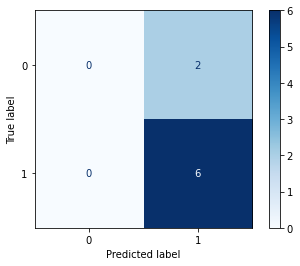

In [61]:
plot_confusion_matrix(pipe_lgb, X_test, y_test, cmap = 'Blues');

# Light Gradient Boosting Machine - Optimized - Averaged Data

Set ranges for hyperparameters:

In [62]:
params = {'lgbmclassifier__max_depth': range(5,9),
          'lgbmclassifier__num_leaves': range(4,14),
          'lgbmclassifier__min_data_in_leaf': range(1,4)}

In [63]:
lgb_gridsearch = GridSearchCV(pipe_lgb, params, cv = 5)

Run gridsearch to find best combination of hyperparameters:

In [64]:
lgb_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8aa4168150>)])),
                                       ('lgbmclassifier', LGBMClassifier())]),
             param_grid={'lgbmclassifier__max_depth': range(5, 9),
                         'lgbmclassifier__min_data_in_leaf': range(1, 4),
                         'lgbmclassifier__num_leaves': range(4, 14)})

The best hyperparameters from this gridsearch:

In [ ]:
print(lgb_gridsearch.best_params_)

Adjust hyperparameter ranges to optimize model based on previous gridsearch:

In [66]:
params1 = {'lgbmclassifier__max_depth': range(2,5),
          'lgbmclassifier__num_leaves': range(2,4),
          'lgbmclassifier__min_data_in_leaf': range(2,4)}

In [67]:
gridsearch_lgb_2nd = GridSearchCV(pipe_lgb, params1, cv = 10)

In [68]:
gridsearch_lgb_2nd.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8aa4168150>)])),
                                       ('lgbmclassifier', LGBMClassifier())]),
             param_grid={'lgbmclassifier__max_depth': range(2, 5),
                         'lgbmclassifier__min_data_in_leaf': range(2, 4),
                         'lgbmclassifier__num_leaves': range(2, 4)})

Best parameters from thie gridsearch used in the final optimized model:

In [69]:
print(gridsearch_lgb_2nd.best_params_)

{'lgbmclassifier__max_depth': 2, 'lgbmclassifier__min_data_in_leaf': 2, 'lgbmclassifier__num_leaves': 2}


In [70]:
lgb_best = lgb_gridsearch.best_estimator_

In [71]:
y_pred_lgb_best = lgb_best.predict(X_test)
y_pred_lgb_best_train = lgb_best.predict(X_train)

In [72]:
lgb_best_train_accuracy = accuracy_score(y_train, y_pred_lgb_best_train)
print(f'Light Gradient Boosting Optimized Train Accuracy: {lgb_best_train_accuracy}')

Light Gradient Boosting Optimized Train Accuracy: 1.0


In [73]:
lgb_best_test_accuracy = accuracy_score(y_test, y_pred_lgb_best)
print(f'Light Gradient Boosting Optimized Test Accuracy: {lgb_best_test_accuracy}')

Light Gradient Boosting Optimized Test Accuracy: 0.75


In [74]:
class_report_lgb_best = classification_report(y_test, y_pred_lgb_best)
print(class_report_lgb_best)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      1.00      0.86         6

    accuracy                           0.75         8
   macro avg       0.38      0.50      0.43         8
weighted avg       0.56      0.75      0.64         8



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


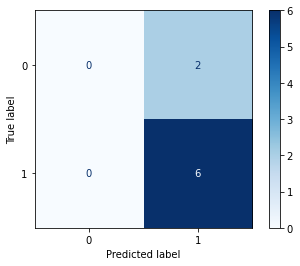

In [75]:
plot_confusion_matrix(lgb_best, X_test, y_test, cmap = 'Blues');

# eXtreme Gradient Boost Machine - Base Model - Averaged Data

In [76]:
xgb = XGBClassifier()

pipe_xgb = make_pipeline(col_transformer, xgb)

In [77]:
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8aa4168150>)])),
                ('xgbclassifier', XGBClassifier())])

In [78]:
y_pred_xgb = pipe_xgb.predict(X_test)
y_pred_xgb_train = pipe_xgb.predict(X_train)

In [79]:
xgb_train_accuracy = accuracy_score(y_train, y_pred_xgb_train)
print(f'Extreme Gradient Boosting Test Accuracy: {xgb_train_accuracy}')

Extreme Gradient Boosting Test Accuracy: 0.9166666666666666


In [80]:
xgb_test_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Extreme Gradient Boosting Test Accuracy: {xgb_test_accuracy}')

Extreme Gradient Boosting Test Accuracy: 0.875


In [81]:
class_report_xgb = classification_report(y_pred_xgb, y_test)
print(class_report_xgb)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.86      0.92         7

    accuracy                           0.88         8
   macro avg       0.75      0.93      0.79         8
weighted avg       0.94      0.88      0.89         8



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


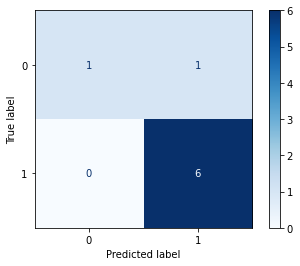

In [82]:
plot_confusion_matrix(pipe_xgb, X_test, y_test, cmap = 'Blues');

# eXtreme Gradient Boost Machine - Optimized Model - Averaged Data

Choosing a range of hyperparameters to find values that optimize the model:


In [83]:
params2 = {
    'xgbclassifier__n_estimators': [50, 100, 150, 200],
    'xgbclassifier__learning_rate': [0.05, 0.1, 0.3, 0.5, 0.7],
    'xgbclassifier__max_depth': [2, 3, 5, 10, 15]}

In [84]:
xgb_gridsearch = GridSearchCV(pipe_xgb, params2, cv = 3, refit = True)

Run gridsearch to find best combination of hyperparameters:

In [85]:
xgb_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8aa4168150>)])),
                                       ('xgbclassifier', XGBClassifier())]),
             param_grid={'xgbclassifier__learning_rate': [0.05, 0.1, 0.3, 0.5,
                                                          0.7],
                         'xgbclassifier__max_depth': [2, 3, 5, 10, 15],
                         'xgbclassifier__n_estimators': [50, 100, 150, 200]})

The best hyperparameters chosen for the model:

In [86]:
print(xgb_gridsearch.best_params_)

{'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 2, 'xgbclassifier__n_estimators': 150}


In [87]:
xgb_opt_model = xgb_gridsearch.best_estimator_

In [88]:
y_pred_xgb_opt_test = xgb_opt_model.predict(X_test)
y_pred_xgb_opt_train = xgb_opt_model.predict(X_train)

In [89]:
xgb_opt_train_accuracy = accuracy_score(y_train, y_pred_xgb_opt_train)
print(f'Extreme Gradient Boosting Optimized Test Accuracy: {xgb_opt_train_accuracy}')

Extreme Gradient Boosting Optimized Test Accuracy: 0.9166666666666666


In [90]:
xgb_opt_test_accuracy = accuracy_score(y_test, y_pred_xgb_opt_test)
print(f'Extreme Gradient Boosting Optimized Test Accuracy: {xgb_opt_test_accuracy}')

Extreme Gradient Boosting Optimized Test Accuracy: 0.875


In [91]:
class_report_xgb_opt = classification_report(y_pred_xgb_opt_test, y_test)
print(class_report_xgb_opt)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.86      0.92         7

    accuracy                           0.88         8
   macro avg       0.75      0.93      0.79         8
weighted avg       0.94      0.88      0.89         8



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


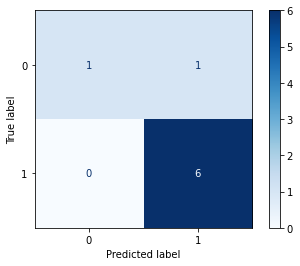

In [92]:
plot_confusion_matrix(xgb_opt_model, X_test, y_test, cmap = 'Blues');